In [ ]:
!pip install nselib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: toolz
    Found existing installation: toolz 0.12.1
    Uninstalling toolz-0.12.1:
      Successfully uninstalled toolz-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 9.5.0 requires toolz<1,>=0.11, but you have toolz 1.1.0 which is incompatible.


In [ ]:
from nselib import derivatives
import pandas as pd

# Fetch data
df = derivatives.future_price_volume_data(symbol='NIFTY',
                                          instrument='FUTIDX',
                                          from_date='01-01-2024',
                                          to_date='31-01-2024')

# 1. Clean column names (strip spaces and convert to uppercase)
df.columns = [col.upper().strip() for col in df.columns]

# 2. Print columns to verify what we have
print("Available columns:", df.columns.tolist())

# 3. Select columns safely
# Note: 'CLOSE' is often 'SETTLE_PR' or 'LTP' in some NSE reports
# 'CHG_IN_OI' is sometimes 'CHANGE_IN_OI'
target_cols = ['INSTRUMENT', 'SYMBOL', 'EXPIRY_DT', 'STRIKE_PRICE', 'OPTION_TYPE', 'MARKET_TYPE', 'OPENING_PRICE', 'TRADE_HIGH_PRICE', 'TRADE_LOW_PRICE', 'CLOSING_PRICE', 'LAST_TRADED_PRICE', 'PREV_CLS', 'SETTLE_PRICE', 'TOT_TRADED_QTY', 'TOT_TRADED_VAL', 'OPEN_INT', 'CHANGE_IN_OI', 'MARKET_LOT', 'TIMESTAMP', 'TIMESTAMP_ORDER', 'UNDERLYING_VALUE', 'CALCULATED_PREMIUM_VAL']

# Filter only columns that actually exist to avoid the KeyError
existing_cols = [c for c in target_cols if c in df.columns]
print(df[existing_cols].head())

Available columns: ['INSTRUMENT', 'SYMBOL', 'EXPIRY_DT', 'STRIKE_PRICE', 'OPTION_TYPE', 'MARKET_TYPE', 'OPENING_PRICE', 'TRADE_HIGH_PRICE', 'TRADE_LOW_PRICE', 'CLOSING_PRICE', 'LAST_TRADED_PRICE', 'PREV_CLS', 'SETTLE_PRICE', 'TOT_TRADED_QTY', 'TOT_TRADED_VAL', 'OPEN_INT', 'CHANGE_IN_OI', 'MARKET_LOT', 'TIMESTAMP', 'TIMESTAMP_ORDER', 'UNDERLYING_VALUE', 'CALCULATED_PREMIUM_VAL']
  INSTRUMENT SYMBOL    EXPIRY_DT  STRIKE_PRICE OPTION_TYPE MARKET_TYPE  \
0     FUTIDX  NIFTY  29-Feb-2024             0          XX           N   
1     FUTIDX  NIFTY  25-Apr-2024             0          XX           N   
2     FUTIDX  NIFTY  28-Mar-2024             0          XX           N   
3     FUTIDX  NIFTY  25-Apr-2024             0          XX           N   
4     FUTIDX  NIFTY  28-Mar-2024             0          XX           N   

   OPENING_PRICE  TRADE_HIGH_PRICE  TRADE_LOW_PRICE  CLOSING_PRICE  ...  \
0       21614.95          21840.00         21570.00       21808.60  ...   
1       21890.30        

In [ ]:
!pip install itables
from itables import show

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.7 MB/s eta 0:00:00


In [ ]:
show(df, paging=True, search=True)

/usr/local/lib/python3.12/dist-packages/itables/typing.py:323: SyntaxWarning: search=True does not match NotRequired[Mapping[str, Any]]: value of key 'search' of dict is not a mapping. You can silence this warning by setting `itables.options.warn_on_unexpected_option_type=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


Loading ITables v2.7.0 from the internet... (need help?)


In [ ]:
!pip install jugaad-data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.13.5
    Uninstalling beautifulsoup4-4.13.5:
      Successfully uninstalled beautifulsoup4-4.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.23.0 requires click<9.0.0,>=8.1.8, but you have click 7.1.2 which is incompatible.
yfinance 0.2.66 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.3 which is incompatible.
wandb 0.24.1 requires click>=8.0.1, but you have click 7.1.2 which is incompatible.
fiona 1.10.1 requires click~=8.0, but you have

In [8]:
import pandas as pd
import requests
from datetime import datetime, timedelta
from io import BytesIO
import time

def get_historical_participant_data(years=10):
    all_dfs = []
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}

    # Calculate start and end dates
    end_date = datetime.now()
    start_date = end_date - timedelta(days=years * 365)

    current_date = start_date
    print(f"Starting download from {start_date.date()} to {end_date.date()}...")

    while current_date <= end_date:
        # NSE Date format for the URL is ddmmyyyy
        date_str = current_date.strftime('%d%m%Y')
        url = f"https://archives.nseindia.com/content/nsccl/fao_participant_oi_{date_str}.csv"

        try:
            response = requests.get(url, headers=headers, timeout=5)
            if response.status_code == 200:
                # Read CSV, skip the 1st row (usually a title row)
                df = pd.read_csv(BytesIO(response.content), skiprows=1)
                df.columns = [c.strip() for c in df.columns]

                # Add a Date column so we can track the trend
                df['Date'] = current_date.date()
                all_dfs.append(df)
                print(f"Successfully fetched: {current_date.date()}")

            # Anti-blocking sleep (essential for bulk downloads)
            time.sleep(0.5)

        except Exception as e:
            pass # Skip errors/holidays

        current_date += timedelta(days=1)

    if all_dfs:
        final_df = pd.concat(all_dfs, ignore_index=True)
        return final_df
    else:
        return None

# --- Run the Process ---
# Start with a smaller range first to test (e.g., years=0.1 for ~1 month)
master_df = get_historical_participant_data(years=26)

if master_df is not None:
    print("\nDownload Complete!")
    display(master_df.head(25))

Starting download from 2000-02-14 to 2026-02-07...
Successfully fetched: 2012-01-02
Successfully fetched: 2012-01-03
Successfully fetched: 2012-01-04
Successfully fetched: 2012-01-05
Successfully fetched: 2012-01-06
Successfully fetched: 2012-01-07
Successfully fetched: 2012-01-09
Successfully fetched: 2012-01-10
Successfully fetched: 2012-01-11
Successfully fetched: 2012-01-12
Successfully fetched: 2012-01-13
Successfully fetched: 2012-01-16
Successfully fetched: 2012-01-17
Successfully fetched: 2012-01-18
Successfully fetched: 2012-01-19
Successfully fetched: 2012-01-20
Successfully fetched: 2012-01-23
Successfully fetched: 2012-01-24
Successfully fetched: 2012-01-25
Successfully fetched: 2012-01-27
Successfully fetched: 2012-01-30
Successfully fetched: 2012-01-31
Successfully fetched: 2012-02-01
Successfully fetched: 2012-02-02
Successfully fetched: 2012-02-03
Successfully fetched: 2012-02-06
Successfully fetched: 2012-02-07
Successfully fetched: 2012-02-08
Successfully fetched: 201

,CLIENT_TYPE,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,...,481180,715231,583933,886558,263176,131878,212194,127548,2895632,2419125
0,Client,257881,226013,585861,208232,480658,314430,436639,486856,54227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FII,55396,1387,43964,28800,75765,52761,0,0,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DII,198027,208336,320271,660508,209040,440052,226048,147364,7448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pro,56931,132499,95290,147846,186326,212194,289102,385217,12065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total,568235,568235,1045386,1045386,951789,1019437,951789,1019437,78740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Client,239132,250336,585537,223363,435829,423107,444824.0,538867.0,54334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,DII,60612,639,44914,29422,78045,51511,NaN,NaN,5903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FII,226477,204064,330454,655729,222036,436248,221610.0,161147.0,8271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Pro,70218,141400,104817,157208,227711,202153,297187.0,413005.0,17113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TOTAL,596439,596439,1065722,1065722,963621,1113019,963621.0,1113019.0,85621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
master_df.count()

,0
CLIENT_TYPE,20
Future Index Long,17445
Future Index Short,17445
Future Stock Long,17445
Future Stock Short,17445
...,...
131878,4
212194,4
127548,4
2895632,4


In [10]:
from google.colab import files

# 1. Save locally to the Colab environment first
master_df.to_csv('fii_dii_historical_data.csv', index=False)

# 2. Trigger a browser download to your local machine
files.download('fii_dii_historical_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
display(master_df.head(125))

,CLIENT_TYPE,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,...,481180,715231,583933,886558,263176,131878,212194,127548,2895632,2419125
0,Client,257881,226013,585861,208232,480658,314430,436639,486856,54227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FII,55396,1387,43964,28800,75765,52761,0,0,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DII,198027,208336,320271,660508,209040,440052,226048,147364,7448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pro,56931,132499,95290,147846,186326,212194,289102,385217,12065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total,568235,568235,1045386,1045386,951789,1019437,951789,1019437,78740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,NaN,224102,390521,544911,261947,335985,726255,524826,648796,83288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,55612,5814,36230,26917,64480,11150,0,0,1025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,328706,138645,370999,604137,339847,527435,210425,231510,10813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,85487,158927,103392,162531,320484,223759,325545,608293,31382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 1. Fill missing values in 'Client Type' with values from 'CLIENT_TYPE'
# This 'heals' the data regardless of which name was used in that year
master_df['Client Type'] = master_df['Client Type'].fillna(master_df['CLIENT_TYPE'])

# 2. Drop the redundant uppercase column
master_df = master_df.drop(columns=['CLIENT_TYPE'], errors='ignore')

# 3. Final cleaning: remove any trailing spaces and ensure consistent casing
master_df['Client Type'] = master_df['Client Type'].str.strip()

master_df.head(50)

,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,Option Stock Put Long,...,481180,715231,583933,886558,263176,131878,212194,127548,2895632,2419125
0,257881,226013,585861,208232,480658,314430,436639,486856,54227,29671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55396,1387,43964,28800,75765,52761,0,0,5000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,198027,208336,320271,660508,209040,440052,226048,147364,7448,4785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56931,132499,95290,147846,186326,212194,289102,385217,12065,11488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,568235,568235,1045386,1045386,951789,1019437,951789,1019437,78740,45944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,239132,250336,585537,223363,435829,423107,444824.0,538867.0,54334,39032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60612,639,44914,29422,78045,51511,NaN,NaN,5903,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,226477,204064,330454,655729,222036,436248,221610.0,161147.0,8271,5899.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70218,141400,104817,157208,227711,202153,297187.0,413005.0,17113,11866.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,596439,596439,1065722,1065722,963621,1113019,963621.0,1113019.0,85621,56797.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Assuming 'master_df' is your DataFrame from the previous step
# 1. Ensure the Date column is in datetime format
master_df['Date'] = pd.to_datetime(master_df['Date'])

# 2. Set the MultiIndex
# Level 0 = Date, Level 1 = Client Type
mi_df = master_df.set_index(['Date', 'Client Type'])

# 3. Sort the index (crucial for slicing)
mi_df = mi_df.sort_index()

# View the result
display(mi_df.head(50))

Future Index Long Future Index Short Future Stock Long  \
Date       Client Type                                                          
2012-01-02 Client                 257881             226013            585861   
           DII                    198027             208336            320271   
           FII                     55396               1387             43964   
           Pro                     56931             132499             95290   
           Total                  568235             568235           1045386   
2012-01-03 Client                 239132             250336            585537   
           DII                     60612                639             44914   
           FII                    226477             204064            330454   
           Pro                     70218             141400            104817   
           TOTAL                  596439             596439           1065722   
2012-01-04 Client                 241026             245456            581860   
           DII                     61383                712             47009   
           FII                    232078             216193            330011   
           Pro                     63884             136010            105074   
           TOTAL                  598371             598371           1063954   
2012-01-05 Client                 242325             256590            586692   
           DII                     61186                768             49091   
           FII                    250133             221254            336914   
           Pro                     64585             139617            108902   
           TOTAL                  618229             618229           1081599   
2012-01-06 Client                 246102             258296            600317   
           DII                     60752                840             48405   
           FII                    234725             221393            345590   
           Pro                     68567             129617            116870   
           TOTAL                  610146             610146           1111182   
2012-01-07 Client                 247709             257110            601206   
           DII                     60762                840             48421   
           FII                    234719             221766            345472   
           Pro                     66938             130412            116780   
           TOTAL                  610128             610128           1111879   
2012-01-09 Client                 246931             260705            612608   
           DII                     59554                840             48383   
           FII                    229988             212676            344876   
           Pro                     68583             130835            124742   
           TOTAL                  605056             605056           1130609   
2012-01-10 Client                 241562             306196            618457   
           DII                     62957               2268             48822   
           FII                    268363             207192            355335   
           Pro                     83667             140893            131214   
           TOTAL                  656549             656549           1153828   
2012-01-11 Client                 234066             303402            610800   
           DII                     60864               2291             48182   
           FII                    280895             207797            360428   
           Pro                     79521             141856            139900   
           TOTAL                  655346             655346           1159310   
2012-01-12 Client                 232669             304706            616547   
           DII                     67658               2291             47410   
           FII                    281197             2

In [17]:
from google.colab import files

# 1. Save locally to the Colab environment first
mi_df.to_csv('fii-dii_historical_data.csv', index=True)

# 2. Trigger a browser download to your local machine
files.download('fii-dii_historical_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import pandas as pd

# Assuming the file 'fii-dii_historical_data(nse).csv' is uploaded to the Colab environment
# If the file name is slightly different, please adjust it accordingly.
try:
    df_uploaded = pd.read_csv('fii-dii_historical_data(nse).csv')
    print('File imported successfully!')
    display(df_uploaded.head())
except FileNotFoundError:
    print("Error: 'fii-dii_historical_data(nse).csv' not found. Please upload the file to your Colab session or check the file name.")
except Exception as e:
    print(f"An error occurred: {e}")

File imported successfully!


/tmp/ipython-input-3781130242.py:6: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_uploaded = pd.read_csv('fii-dii_historical_data(nse).csv')


,Date,Client Type,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,02-01-2012,Client,257881,226013,585861,208232,480658,314430,436639,486856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-2012,DII,198027,208336,320271,660508,209040,440052,226048,147364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02-01-2012,FII,55396,1387,43964,28800,75765,52761,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02-01-2012,Pro,56931,132499,95290,147846,186326,212194,289102,385217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-01-2012,Total,568235,568235,1045386,1045386,951789,1019437,951789,1019437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_uploaded.columns

Index(['Date', 'Client Type', 'Future Index Long', 'Future Index Short',
       'Future Stock Long', 'Future Stock Short', 'Option Index Call Long',
       'Option Index Put Long', 'Option Index Call Short',
       'Option Index Put Short', 'Option Stock Call Long',
       'Option Stock Put Long', 'Option Stock Call Short',
       'Option Stock Put Short', 'Total Long Contracts',
       'Total Short Contracts', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
    

In [25]:
df = df_uploaded.loc[:, ~df_uploaded.columns.str.contains("^Unnamed")]

In [28]:
df.columns


Index(['Date', 'Client Type', 'Future Index Long', 'Future Index Short',
       'Future Stock Long', 'Future Stock Short', 'Option Index Call Long',
       'Option Index Put Long', 'Option Index Call Short',
       'Option Index Put Short', 'Option Stock Call Long',
       'Option Stock Put Long', 'Option Stock Call Short',
       'Option Stock Put Short', 'Total Long Contracts',
       'Total Short Contracts'],
      dtype='object')

In [30]:
# List of columns that should be numeric
numeric_cols = [
    'Future Index Long', 'Future Index Short', 'Future Stock Long',
    'Future Stock Short', 'Option Index Call Long', 'Option Index Put Long',
    'Option Index Call Short', 'Option Index Put Short'
]

for col in numeric_cols:
    # 1. Remove commas if they exist
    df[col] = df[col].astype(str).str.replace(',', '')
    # 2. Convert to numeric (errors='coerce' turns non-numeric junk into NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Now your subtraction will work!
df['Net Index Future'] = df['Future Index Long'] - df['Future Index Short']

/tmp/ipython-input-4123404656.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '')
/tmp/ipython-input-4123404656.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
/tmp/ipython-input-4123404656.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [31]:
# Assume 'df' is your loaded dataframe
# 1. Filter for FII and sort by date
fii_df = df[df['Client Type'] == 'FII'].sort_values('Date').copy()

# 2. Calculate Net Positions
fii_df['Net Index Future'] = fii_df['Future Index Long'] - fii_df['Future Index Short']
fii_df['Net Index Call'] = fii_df['Option Index Call Long'] - fii_df['Option Index Call Short']
fii_df['Net Index Put'] = fii_df['Option Index Put Long'] - fii_df['Option Index Put Short']

# 3. Calculate Daily Changes (OI Change)
fii_df['Future OI Chg'] = fii_df['Net Index Future'].diff()
fii_df['Call OI Chg'] = fii_df['Net Index Call'].diff()
fii_df['Put OI Chg'] = fii_df['Net Index Put'].diff()

# 4. Define Sentiment Logic
fii_df['Call View'] = fii_df['Call OI Chg'].apply(lambda x: "BULLISH" if x > 0 else "BEARISH")
fii_df['Put View'] = fii_df['Put OI Chg'].apply(lambda x: "BEARISH" if x > 0 else "BULLISH")
fii_df['Future View'] = fii_df['Future OI Chg'].apply(lambda x: "BULLISH" if x > 0 else "BEARISH")

/tmp/ipython-input-3732391180.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
/tmp/ipython-input-3732391180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
/tmp/ipython-input-3732391180.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

            Date  Call OI Chg Call View  Put OI Chg Put View  Future OI Chg  \
7     2012-01-03     -75339.0   BEARISH    222340.0  BEARISH       -31596.0   
12    2012-01-04       9361.0   BULLISH      5042.0  BEARISH        -6528.0   
17    2012-01-05       2981.0   BULLISH      3341.0  BEARISH        12994.0   
22    2012-01-06       -765.0   BEARISH     11186.0  BEARISH       -15547.0   
27    2012-01-07      -1910.0   BEARISH     -2411.0  BULLISH         -379.0   
...          ...          ...       ...         ...      ...            ...   
17439 2026-02-02      61371.0   BULLISH    -29659.0  BULLISH         6080.0   
17444 2026-02-03      80495.0   BULLISH   -127915.0  BULLISH        39687.0   
17449 2026-02-04      25811.0   BULLISH    -57135.0  BULLISH        10136.0   
17454 2026-02-05      -4784.0   BEARISH     59948.0  BEARISH         3294.0   
17459 2026-02-06      42047.0   BULLISH     23045.0  BEARISH        -6228.0   

      Future View  
7         BEARISH  
12        B

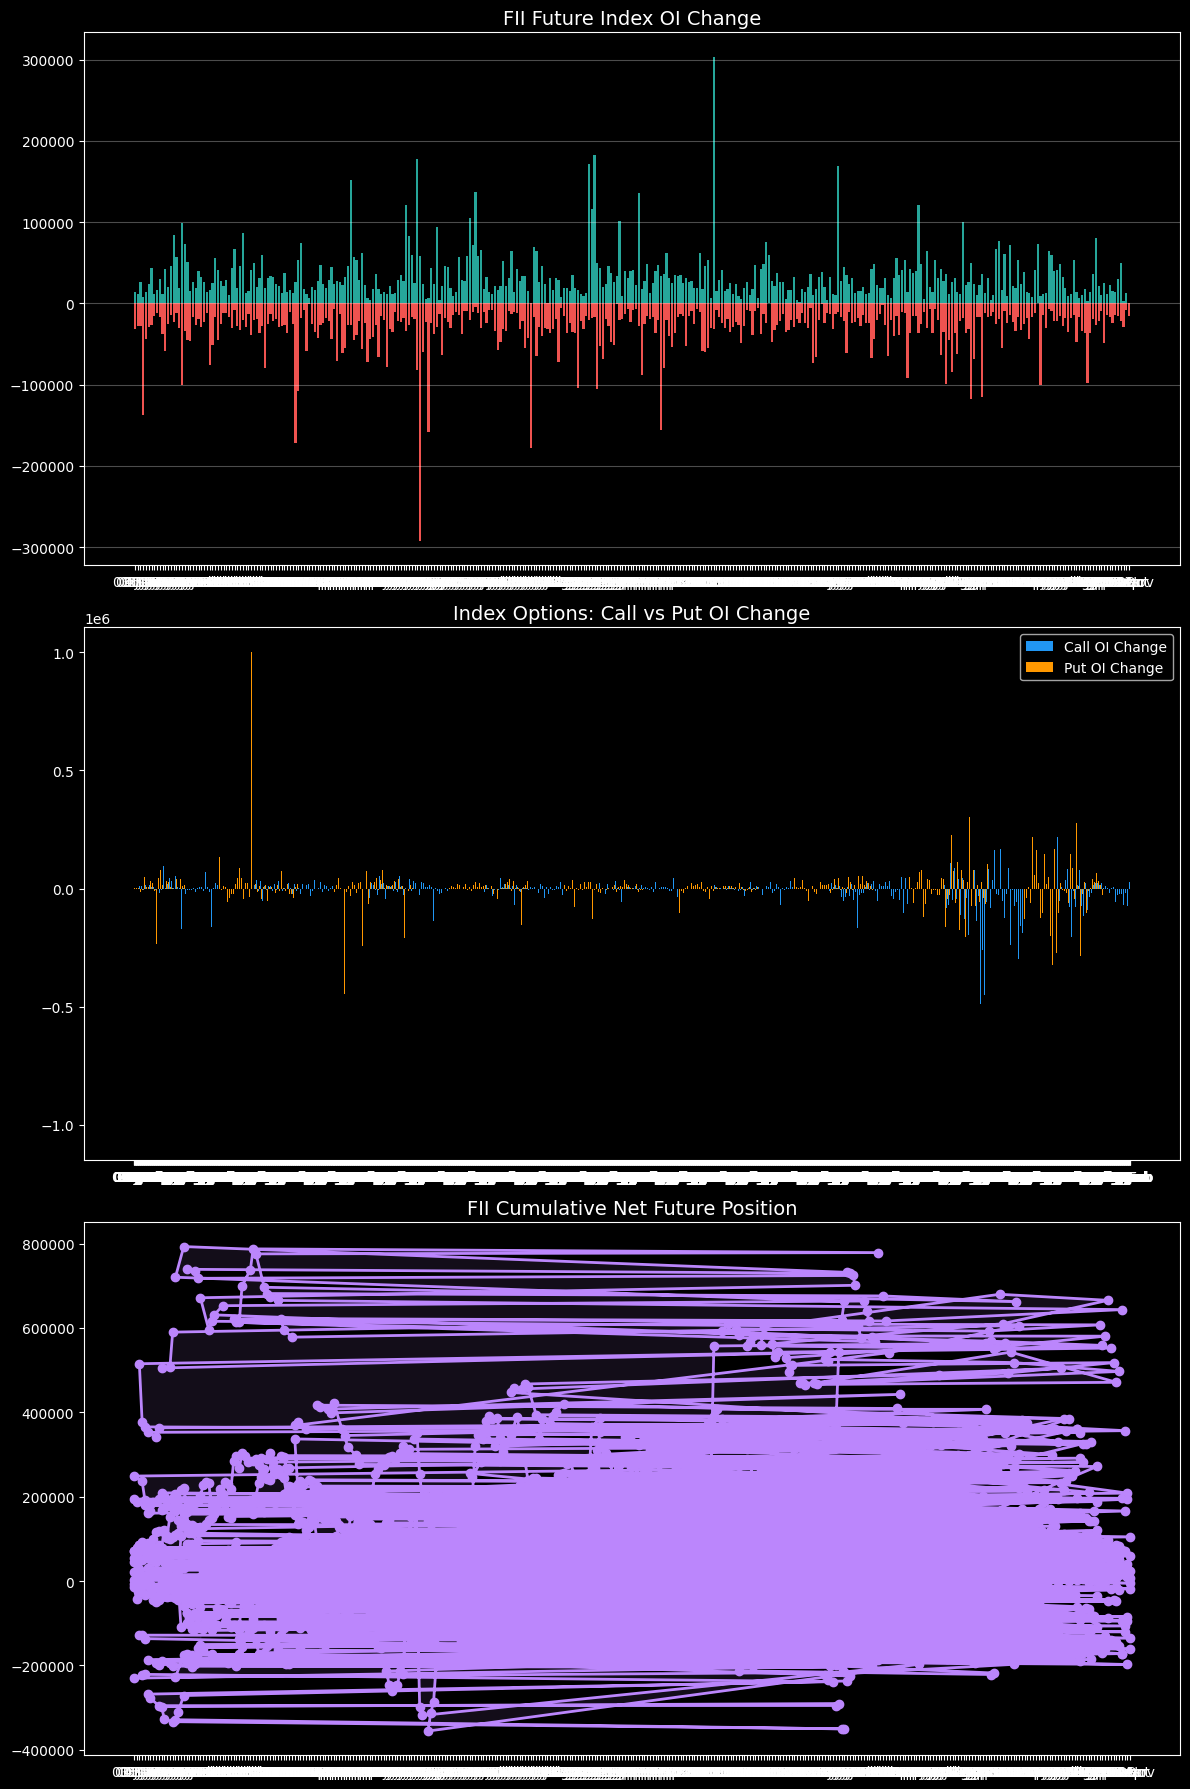

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: LOAD YOUR DATA ---
# If you uploaded a file, use: df = pd.read_csv('your_file.csv')
# For this example, I'll assume your dataframe is named 'df'

# --- STEP 2: DATA CLEANING (Fixes the TypeError) ---
# List all columns that need to be numeric
cols_to_fix = [
    'Future Index Long', 'Future Index Short', 'Future Stock Long',
    'Future Stock Short', 'Option Index Call Long', 'Option Index Put Long',
    'Option Index Call Short', 'Option Index Put Short', 'Option Stock Call Long',
    'Option Stock Put Long', 'Option Stock Call Short', 'Option Stock Put Short'
]

for col in cols_to_fix:
    # Remove commas and convert to numeric
    df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Convert Date to datetime objects
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# --- STEP 3: CALCULATE NET POSITIONS & OI CHANGE ---
# We focus on FIIs (you can change this to 'Pro' or 'Client' as needed)
fii_df = df[df['Client Type'] == 'FII'].sort_values('Date').copy()

# Net = Longs - Shorts
fii_df['Net Future'] = fii_df['Future Index Long'] - fii_df['Future Index Short']
fii_df['Net Call'] = fii_df['Option Index Call Long'] - fii_df['Option Index Call Short']
fii_df['Net Put'] = fii_df['Option Index Put Long'] - fii_df['Option Index Put Short']

# OI Change = Today's Net - Yesterday's Net
fii_df['Future OI Chg'] = fii_df['Net Future'].diff()
fii_df['Call OI Chg'] = fii_df['Net Call'].diff()
fii_df['Put OI Chg'] = fii_df['Net Put'].diff()

# --- STEP 4: BULLISH / BEARISH LOGIC ---
def get_view(val, category):
    if pd.isna(val): return "NEUTRAL"
    if category == 'put':
        # Buying Puts (Positive Change) is Bearish
        return "BEARISH" if val > 0 else "BULLISH"
    else:
        # For Futures and Calls, Positive Change is Bullish
        return "BULLISH" if val > 0 else "BEARISH"

fii_df['Future View'] = fii_df['Future OI Chg'].apply(lambda x: get_view(x, 'future'))
fii_df['Call View'] = fii_df['Call OI Chg'].apply(lambda x: get_view(x, 'call'))
fii_df['Put View'] = fii_df['Put OI Chg'].apply(lambda x: get_view(x, 'put'))

# Create final dashboard view
dashboard = fii_df[['Date', 'Call OI Chg', 'Call View', 'Put OI Chg', 'Put View', 'Future OI Chg', 'Future View']].dropna()
print(dashboard)

# --- STEP 5: VISUALIZATION ---
plt.style.use('dark_background') # Making it look professional like trading terminals
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Graph 1: Future OI Change
colors_fut = ['#26a69a' if x > 0 else '#ef5350' for x in dashboard['Future OI Chg']]
axes[0].bar(dashboard['Date'].dt.strftime('%d %b'), dashboard['Future OI Chg'], color=colors_fut)
axes[0].set_title('FII Future Index OI Change', fontsize=14)
axes[0].grid(axis='y', alpha=0.3)

# Graph 2: Options Comparison
x = np.arange(len(dashboard))
width = 0.35
axes[1].bar(x - width/2, dashboard['Call OI Chg'], width, label='Call OI Change', color='#2196f3')
axes[1].bar(x + width/2, dashboard['Put OI Chg'], width, label='Put OI Change', color='#ff9800')
axes[1].set_xticks(x)
axes[1].set_xticklabels(dashboard['Date'].dt.strftime('%d %b'))
axes[1].set_title('Index Options: Call vs Put OI Change', fontsize=14)
axes[1].legend()

# Graph 3: Net Cumulative Future Position
axes[2].plot(dashboard['Date'].dt.strftime('%d %b'), fii_df['Net Future'].iloc[1:], marker='o', color='#bb86fc', linewidth=2)
axes[2].set_title('FII Cumulative Net Future Position', fontsize=14)
axes[2].fill_between(dashboard['Date'].dt.strftime('%d %b'), fii_df['Net Future'].iloc[1:], color='#bb86fc', alpha=0.1)

plt.tight_layout()
plt.show()

/tmp/ipython-input-447665036.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
/tmp/ipython-input-447665036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
/tmp/ipython-input-447665036.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

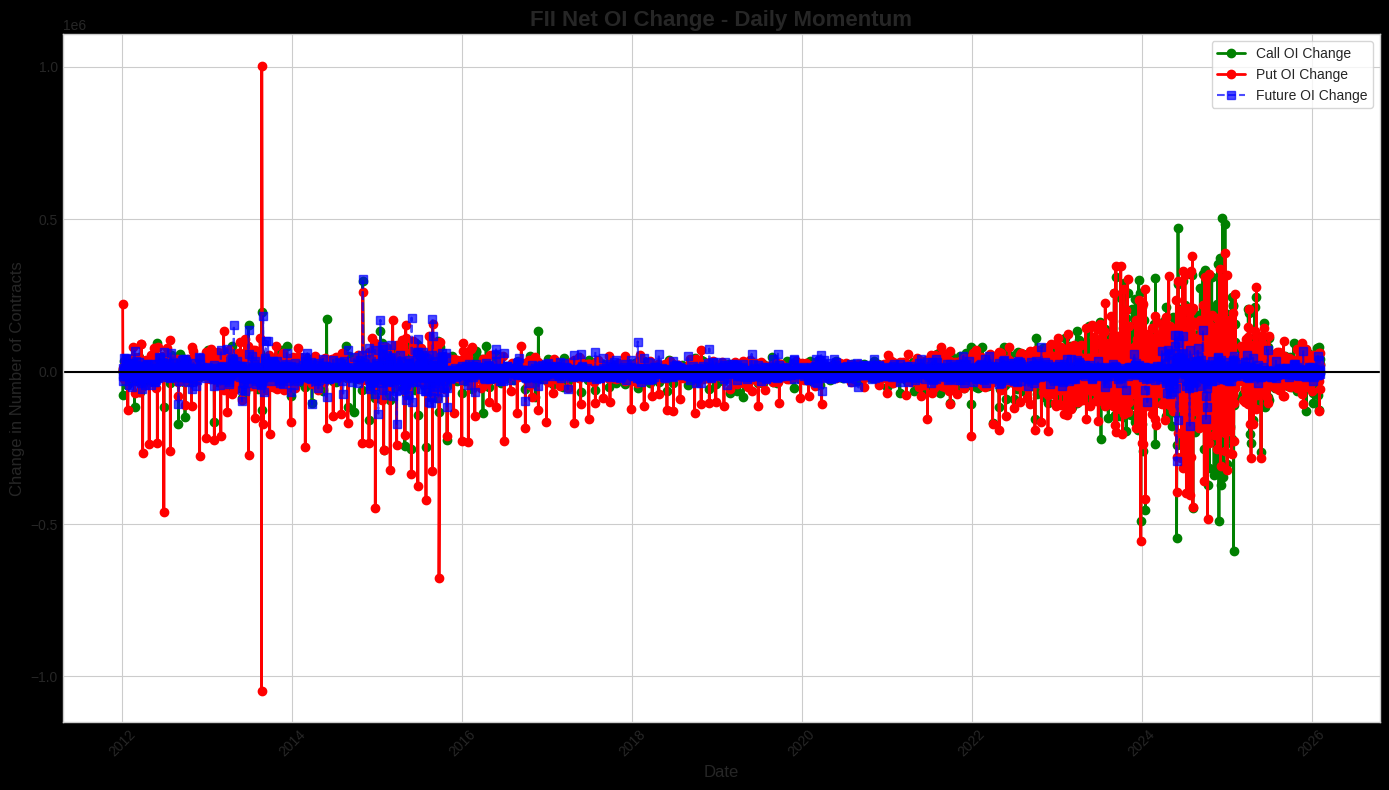

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- STEP 1 & 2: CLEANING (As done previously) ---
cols_to_fix = [
    'Future Index Long', 'Future Index Short', 'Option Index Call Long',
    'Option Index Put Long', 'Option Index Call Short', 'Option Index Put Short'
]
for col in cols_to_fix:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
fii_df = df[df['Client Type'] == 'FII'].sort_values('Date').copy()

# --- STEP 3: CALCULATE NET & CHANGE ---
fii_df['Net Future'] = fii_df['Future Index Long'] - fii_df['Future Index Short']
fii_df['Net Call'] = fii_df['Option Index Call Long'] - fii_df['Option Index Call Short']
fii_df['Net Put'] = fii_df['Option Index Put Long'] - fii_df['Option Index Put Short']

fii_df['Future OI Chg'] = fii_df['Net Future'].diff()
fii_df['Call OI Chg'] = fii_df['Net Call'].diff()
fii_df['Put OI Chg'] = fii_df['Net Put'].diff()

# Filter out the first row (NaN from .diff())
plot_df = fii_df.dropna(subset=['Future OI Chg'])

# --- STEP 4: LINE GRAPH VISUALIZATION ---
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid') # Clean, readable style

# Plotting the lines
plt.plot(plot_df['Date'], plot_df['Call OI Chg'], label='Call OI Change', color='green', marker='o', linewidth=2)
plt.plot(plot_df['Date'], plot_df['Put OI Chg'], label='Put OI Change', color='red', marker='o', linewidth=2)
plt.plot(plot_df['Date'], plot_df['Future OI Chg'], label='Future OI Change', color='blue', linestyle='--', marker='s', alpha=0.7)

# Adding a Zero Line for sentiment reference
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')

# Formatting
plt.title('FII Net OI Change - Daily Momentum', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change in Number of Contracts', fontsize=12)
plt.legend(frameon=True, fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/tmp/ipython-input-597967846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
/tmp/ipython-input-597967846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
/tmp/ipython-input-597967846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

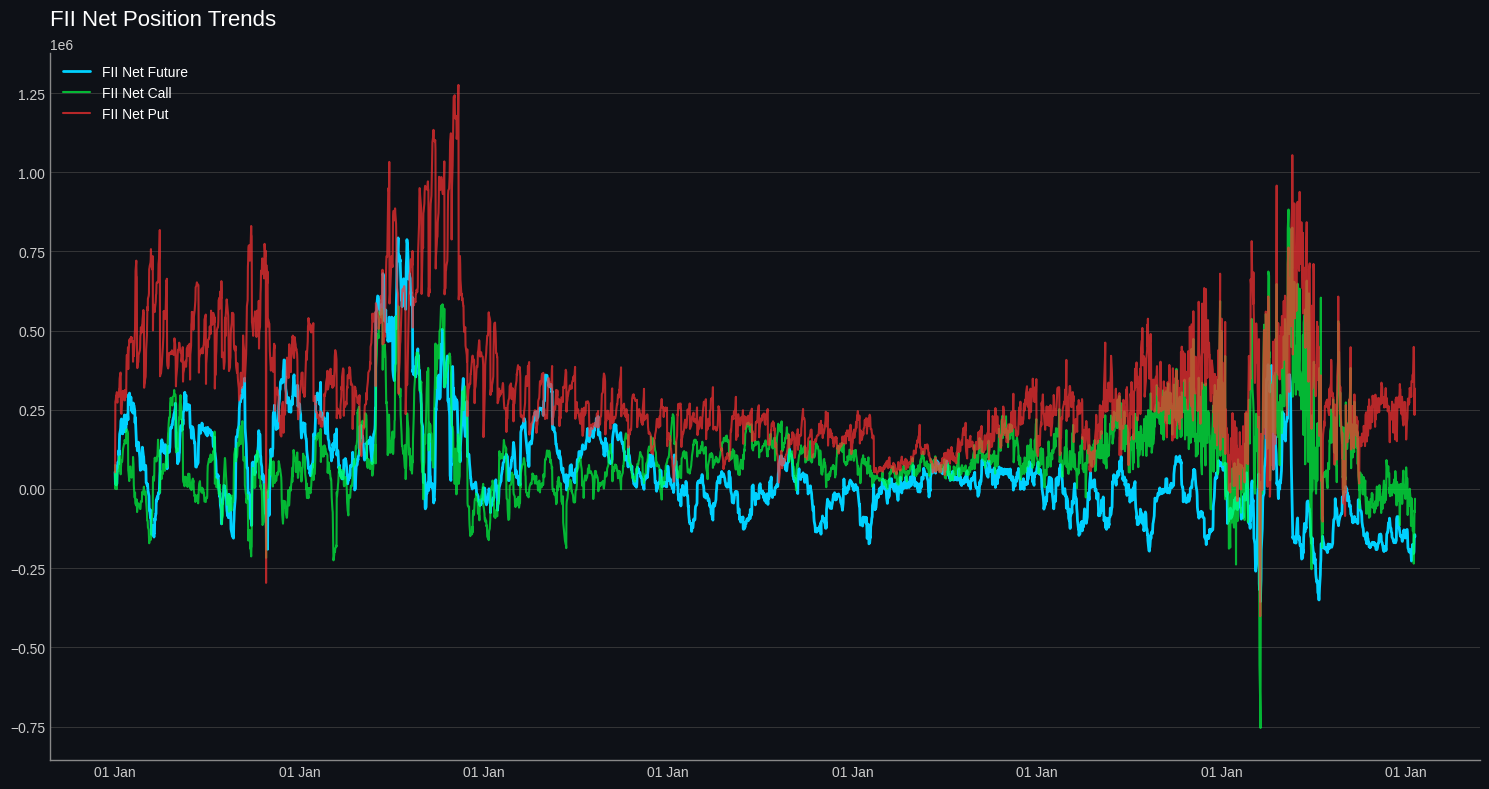

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. DATA CLEANING ---
cols_to_fix = [
    'Future Index Long', 'Future Index Short', 'Option Index Call Long',
    'Option Index Put Long', 'Option Index Call Short', 'Option Index Put Short'
]
for col in cols_to_fix:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
fii_df = df[df['Client Type'] == 'FII'].sort_values('Date').copy()

# --- 2. CALCULATE CUMULATIVE NET POSITIONS ---
# This creates the "trending" line similar to your reference image
fii_df['Net Future'] = fii_df['Future Index Long'] - fii_df['Future Index Short']
fii_df['Net Call'] = fii_df['Option Index Call Long'] - fii_df['Option Index Call Short']
fii_df['Net Put'] = fii_df['Option Index Put Long'] - fii_df['Option Index Put Short']

# --- 3. PLOTTING THE "CLEAN" VIEW ---
plt.figure(figsize=(15, 8), facecolor='#0e1117') # Dark background
ax = plt.gca()
ax.set_facecolor('#0e1117')

# Plotting lines with high-contrast colors
plt.plot(fii_df['Date'], fii_df['Net Future'], color='#00d1ff', linewidth=2, label='FII Net Future')
plt.plot(fii_df['Date'], fii_df['Net Call'], color='#00ff41', linewidth=1.5, label='FII Net Call', alpha=0.7)
plt.plot(fii_df['Date'], fii_df['Net Put'], color='#ff3131', linewidth=1.5, label='FII Net Put', alpha=0.7)

# --- 4. FORMATTING LIKE THE REFERENCE ---
# Add horizontal lines (grid)
ax.yaxis.grid(True, color='#444444', linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

# Tick colors and labels
ax.tick_params(axis='x', colors='#cccccc', labelsize=10)
ax.tick_params(axis='y', colors='#cccccc', labelsize=10)

# Date formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

# Legend (positioned top left like your image)
plt.legend(loc='upper left', frameon=False, fontsize=10, labelcolor='white')

plt.title("FII Net Position Trends", color='white', loc='left', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Index(['Date', 'Client Type', 'Future Index Long', 'Future Index Short',
       'Future Stock Long', 'Future Stock Short', 'Option Index Call Long',
       'Option Index Put Long', 'Option Index Call Short',
       'Option Index Put Short', 'Option Stock Call Long',
       'Option Stock Put Long', 'Option Stock Call Short',
       'Option Stock Put Short', 'Total Long Contracts',
       'Total Short Contracts', 'Net Index Future'],
      dtype='object')

In [38]:
import pandas as pd

# Assuming the file 'fii-dii_historical_data(nse).csv' is uploaded to the Colab environment
# If the file name is slightly different, please adjust it accordingly.
try:
    df_uploaded = pd.read_csv('fii-dii_historical_data(nse).csv')
    print('File imported successfully!')
    display(df_uploaded.head())
except FileNotFoundError:
    print("Error: 'fii-dii_historical_data(nse).csv' not found. Please upload the file to your Colab session or check the file name.")
except Exception as e:
    print(f"An error occurred: {e}")

File imported successfully!


/tmp/ipython-input-3781130242.py:6: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_uploaded = pd.read_csv('fii-dii_historical_data(nse).csv')


,Date,Client Type,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,02-01-2012,Client,257881,226013,585861,208232,480658,314430,436639,486856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-2012,DII,198027,208336,320271,660508,209040,440052,226048,147364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02-01-2012,FII,55396,1387,43964,28800,75765,52761,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02-01-2012,Pro,56931,132499,95290,147846,186326,212194,289102,385217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-01-2012,Total,568235,568235,1045386,1045386,951789,1019437,951789,1019437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_fii = df_uploaded

# 1. Keep only the row where 'Client Type' is 'FII'
df_fii = df[df['Client Type'] == 'FII'].copy()


# Optional: Reset the index for a clean look
df_fii = df_fii.reset_index(drop=True)

print(df_fii)

           Date Client Type  Future Index Long  Future Index Short  \
0    2012-01-02         FII            55396.0              1387.0   
1    2012-01-03         FII           226477.0            204064.0   
2    2012-01-04         FII           232078.0            216193.0   
3    2012-01-05         FII           250133.0            221254.0   
4    2012-01-06         FII           234725.0            221393.0   
...         ...         ...                ...                 ...   
3488 2026-02-02         FII            30005.0            227144.0   
3489 2026-02-03         FII            40023.0            197475.0   
3490 2026-02-04         FII            43892.0            191208.0   
3491 2026-02-05         FII            42302.0            186324.0   
3492 2026-02-06         FII            43462.0            193712.0   

      Future Stock Long  Future Stock Short  Option Index Call Long  \
0               43964.0             28800.0                 75765.0   
1              33

In [43]:
df_fii.columns

Index(['Client Type', 'Future Index Long', 'Future Index Short',
       'Future Stock Long', 'Future Stock Short', 'Option Index Call Long',
       'Option Index Put Long', 'Option Index Call Short',
       'Option Index Put Short', 'Option Stock Call Long',
       'Option Stock Put Long', 'Option Stock Call Short',
       'Option Stock Put Short', 'Total Long Contracts',
       'Total Short Contracts', 'Net Index Future'],
      dtype='object')

In [45]:
# 1. Save locally to the Colab environment first
df_fii.to_csv('fii_historical_data.csv', index=False)

# 2. Trigger a browser download to your local machine
files.download('fii_historical_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>